# Telecom Churn Prediction
<hr>

<img src='https://www.superoffice.com/blog/wp-content/uploads/2015/05/customer-churn-750x400.jpg'> 

<div style='text-align:center;color:gray;font-size:10px'>Phone credit: <a link='https://www.superoffice.com/blog/reduce-customer-churn/'>Superoffice</a></div>

Customers are most important resources for any companies or business. What if these customers left the company due to high charges, better compititor offers, poor customer services or something unknown, which indirectyly shows company's performance. Hence, Customer churn is one of the important metrics for companies to evaluate their performance. It represents customers who left/stopped using company's product or services and reason could be high charges, better compititor offers, poor customer service/retention plan or something unknown.

Customer churn rate is the KPI to understand loosing customers. Churn rate represents the percentage of customer that company lost over all the customers at the beginning of the interval.

For example,

If company had 400 customers at the beginning of the month and end with 360, means company's churn rate is 10%, because company lost 10% of the the customer from the base. Companies try to decrease churn rate as 0%.



## Table of contents
***************************************

### 1) Introdution
- Dataset, features and target value
- Problem description

### 2) Descriptive analysis and EDA (Exploratory Data Analysis) 
- Churn rate and Correlation between features 
- Profile of Churn vs Existing customers 
- Tenure and Monthly charges distribution

### 3) Cluster analysis 
- Churn cluster detection 
- Churn customer cluster analysis – by Demographic, Account type and Service Usage

### 4) Churn customer prediction model 
- Prediction model process 
- Model evaluation

### 5) Retention plan


In [1]:
__author__ = "Shivali Patel"
__email__ = "shivuptl@gmail.com"

## 1. Introduction
<hr>


### Dataset, Features and Target value
Source : https://www.kaggle.com/blastchar/telco-customer-churn ( IBM Sample dataset)

Here, IBM provided customer data for Telco industry to predict churn customer based on demographic, usage and account based information. Main objective is that to analyze churn customer behaviors and develop strategies for customer retention.

Assumption - Here, data source has not provided any information related to time; So I have assumed that records are specific to the perticular month.

Dataset has information related to,

#### Demographic:

- Gender - Male / Female <br>
- Age range - In terms of Partner, Dependent and Senior Citizen

#### Services:

- Phone service - If customer has Phone service, then services related to Phone like;
    - Multiline Phone service
- Internet Service - If customer has Internet service, then services related to Internet like;
    - Online security
    - Online backup
    - Device protection
    - Tech support
    - Streaming TV
    - Streaming Movies

#### Account type:

- Tenure - How long customer is with the company?
- Contract type - What kind of contract they have with a company? Like
    - Monthly bases
    - On going bases - If on going bases, then One month contract or Two year contract
- Paperless billing - Customer is paperless billion option or not?
- Payment method - What kind of payment method customer has?
    - Mailed check
    - Electronic check
    - Credit card (Automatic)
    - Bank transfer (Automatic)

#### Usage:

- Monthly charges
- Total charges

#### Target:

- Churn - Whether customer left the company or still with the company?

### Problem Description

#### Why customers leaving the company?
The reasons behind the customer leaving company could be 
- High charges 
- Better offer from competitor 
- Poor customer service 
- Some unknown reasons

#### How to detect the churn customer? 
- Monitoring usage 
- Analysing complains 
- Analyzing competitors offers

#### How to prevent customers from leaving a company?
Once you detect high risk customers, apply 
- Retention plans 
- Improve customer service


## 2. Descriptive analysis and EDA (Exploratory Data Analysis)
<hr>

Here, I have explored data, features and tried to have some intuition about them.


### Load libraries and dataset

In [183]:
import pandas as pd
import numpy as np
import math as math
import random
from sklearn.utils import shuffle
import sklearn.preprocessing  as prepro
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import resample
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from adjustText import adjust_text


#constants
random_state = 42
plotColor = ['b','g','r','m','c', 'y']
markers = ['+','o','*','^','v','>','<']

#set up
sns.set(style='whitegrid')
%matplotlib inline

In [158]:
# Create Data class which has load_data method
class Data:
    def __init__(self):
        print("Data object initiated")
    
    def Load_data(self,filepath,format='csv'):
        """ Read data from file and return data """
        if format == 'csv':
            return pd.read_csv(filepath)
        elif format == 'xlsx':
            return pd.read_excel(filepath)

In [5]:
data_file = '../Data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
extension = 'csv'

data = Data()
df_raw = data.Load_data(data_file, extension)
df_raw.head(10)

Data object initiated


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Dimensionality & Sanity check

In [6]:
df_raw.shape

(7043, 21)

Dataset has **7043 observations** and **21 features**

In [7]:
# feature exploration

df_raw.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# Checking missing / NULL values

df_raw.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [9]:
# Duplicate value check

df_raw.duplicated().any()

False

In [10]:
# Exploring data types of each feature

df_raw.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We need to rename columns into proper format and need to transform columns like Partner, Dependents and so on to similar format for furture analysis.

Also, need to change data type of TotalCharges to float.

### Data transformation & Renaming

Here, we are going to rename some columns as well as modifying records with proper format for further analysis.

In [20]:
def Data_transformation_renaming(df_raw):
    """ Rename column names and transformed into proper format and return dataframe """
    df_cal = df_raw.copy()
    
    df_cal.rename(columns={'gender':'Gender'
                       ,'customerID':'CustomerID'
                       ,'Contract':'ContractType'
                       ,'InternetService':'InternetServiceType'
                       ,'tenure':'Tenure'
                      }
              ,inplace=True)


    df_cal['Partner'] = df_cal.Partner.map({'Yes':1,'No':0})
    df_cal['Dependents'] = df_cal.Dependents.map({'Yes':1,'No':0})

    df_cal['PhoneService'] = df_cal.PhoneService.map({'Yes':1,'No':0})
    df_cal['MultipleLines'] = df_cal.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})

    df_cal['InternetService'] = df_cal.InternetServiceType.map({'DSL':1,'Fiber optic':1,'No':0})
    df_cal['OnlineSecurity'] = df_cal.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['OnlineBackup'] = df_cal.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['DeviceProtection'] = df_cal.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['TechSupport'] = df_cal.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['StreamingTV'] = df_cal.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['StreamingMovies'] = df_cal.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['PaperlessBilling'] = df_cal.PaperlessBilling.map({'Yes':1,'No':0})
    df_cal['Churn'] = df_cal.Churn.map({'Yes':1,'No':0})
    
    # Data mining
    df_cal['IsContracted'] = df_cal.ContractType.map({'One year':1,'Two year':1,'Month-to-month':0})
    
    # Data transformation
    
    # Converting TotalCharges into Numeric, but some of the records are empty, so first we need to deal with them.
    df_cal.loc[df_cal['TotalCharges']==' ','TotalCharges'] = np.nan
    
    # First we convert TotalCharges to float and then replace with tenure * monthly charges
    df_cal['TotalCharges'] = df_cal['TotalCharges'].astype('float64')
    df_cal.loc[df_cal['TotalCharges'].isnull()==True,'TotalCharges'] = df_cal['MonthlyCharges'] * df_cal['Tenure']
    

    return df_cal

In [21]:
df_cal = Data_transformation_renaming(df_raw)

df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,One year,0,Mailed check,56.95,1889.50,0,1,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0


In [22]:
cat_cols = ["Gender","Partner","Dependents","SeniorCitizen","PhoneService","MultipleLines"
                    ,"InternetServiceType","OnlineSecurity","OnlineBackup","DeviceProtection"
                    ,"TechSupport","StreamingTV","StreamingMovies","IsContracted"
                    ,"ContractType","PaperlessBilling","PaymentMethod"]


num_cols = ["Tenure","MonthlyCharges","TotalCharges"]

target_col = 'Churn'

# spliting categorical columns into Nominal and Binary columns

nominal_cols = ['Gender','InternetServiceType','PaymentMethod','ContractType']

binary_cols = ['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity'
               ,'OnlineBackup' ,'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies'
               ,'PaperlessBilling','InternetService', 'IsContracted']

### Descriptive statistics

In [23]:
df_cal[cat_cols].describe(include='all')

,Gender,Partner,Dependents,SeniorCitizen,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,IsContracted,ContractType,PaperlessBilling,PaymentMethod
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043
unique,2,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,4
top,Male,NaN,NaN,NaN,NaN,NaN,Fiber optic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check
freq,3555,NaN,NaN,NaN,NaN,NaN,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3875,NaN,2365
mean,NaN,0.483033,0.299588,0.162147,0.903166,0.421837,NaN,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.449808,NaN,0.592219,NaN
std,NaN,0.499748,0.458110,0.368612,0.295752,0.493888,NaN,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.497510,NaN,0.491457,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
50%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN
75%,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN


In [24]:
df_cal[num_cols].describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Based on numerical columns descriptive analysis, average tenure, average monthly charges and total charges of subscriber is 32 months, 64 dollars and 2282 dollars, respectively.

In [25]:
def Outlier_boxplot(df, col):
    """ Display boxplot for given column """
    sns.boxplot(x=df[col])
    plt.show()

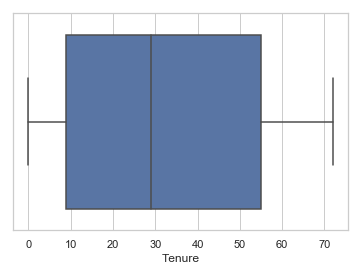

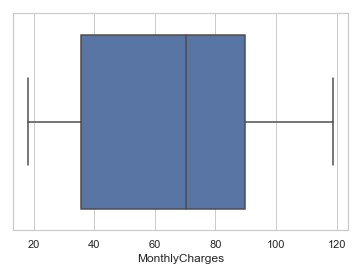

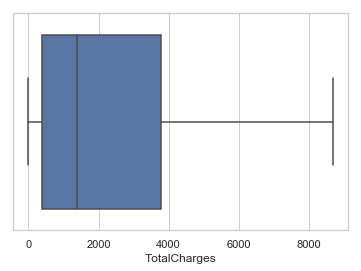

In [26]:
for i in num_cols:
    Outlier_boxplot(df_cal,i)

Box plot graphs shows that none of the numerical columns have outliers.

In [28]:
def Generate_bar_graph(x, y, x_title, y_title, chart_title,color=plotColor):
    """ Based on x and y value, generate bar graph """
    
    fig, ax = plt.subplots()
    ax.bar(range(len(x))
       , y
       , width = 0.75
       , color=color
        , alpha = 0.6) 

    # stopping alphabetical sorting of graph
    plt.xticks(range(len(x)),x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title,fontsize=13)
    plt.ylabel(y_title,fontsize=13)
    plt.grid(b=False)
    plt.yticks(fontsize=0)
    plt.ylim(top=1)

    
    # Visible x - axis line
    for spine in plt.gca().spines.values():
        spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)
    
    # Display label for each plot
    for i,v in (enumerate(y)):
        ax.text(i
                ,v+0.05
                ,str(round((v*100),2))+'%'
                ,fontsize=13
                ,ha='center')
    
    plt.show()


### Calculate Churn Rate

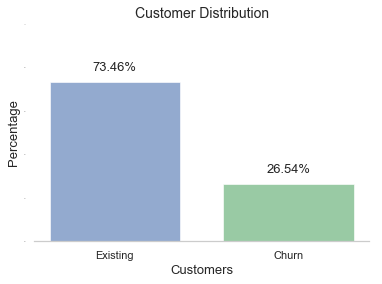

0    0.73463
1    0.26537
Name: Churn, dtype: float64


In [29]:
Churn_rate = df_cal['Churn'].value_counts() / df_cal.shape[0]
Generate_bar_graph(Churn_rate.index.map({0:'Existing',1:"Churn"})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')

print(Churn_rate)

**Churn rate of telecom company is around 26%**, Meaning around 26% of the subscribers left the company during given interval.

### Correlation

In [30]:
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    """ Based on features , generate correlation matrix """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri

    fig,ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()

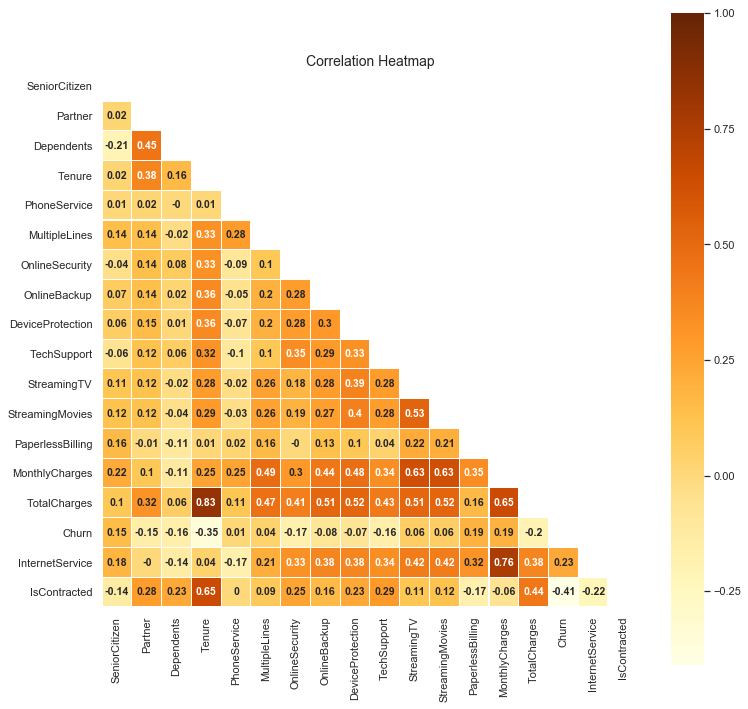

In [31]:
var_corr = round(df_cal.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Correlation Heatmap'
                       ,mask_uppertri = True)

From correlation matrix, features like **Tenure, Monthly charges and Total charges** are **highly correlated with services** like MultipleLines of phone services and Internet services like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and Streaming Movies services.

### Distribution of features as per Churn 

#### Distribution of categorical and binary variables

In [36]:
def Create_data_label(ax):
    """ Display data label for given axis """
    for bar in ax.patches:
            ax.text(bar.get_x() + bar.get_width()/ 2
                    , bar.get_height() + 0.01
                    , str(round(100 * bar.get_height(),2)) + '%'
                    , ha = 'center'
                    , fontsize = 13)
            
            
def Categorical_var_churn_dist(data, cols, distribution_col):
    """ Distribution of categorical variable based on target variable """
    
    for i,feature in enumerate(cols):
        
        feature_summary = data[feature].value_counts(normalize=True).reset_index(name='Percentage')
        
        plt_cat = sns.catplot(x=feature
                , y='Percentage'
                , data = feature_summary
                , col=distribution_col
                , kind='bar'
                , aspect = 0.8
                , palette = plotColor
                , alpha = 0.6)
        
        if feature == 'PaymentMethod':
            plt_cat.set_xticklabels(rotation= 65, horizontalalignment = 'right')
        
        
        for ax1, ax2 in plt_cat.axes:
            Create_data_label(ax1)
            Create_data_label(ax2)
        
        
        plt.ylim(top=1)
        plt.subplots_adjust(top = 0.9)
        plt.gcf().suptitle(feature+" distribution",fontsize=14)
    plt.show()



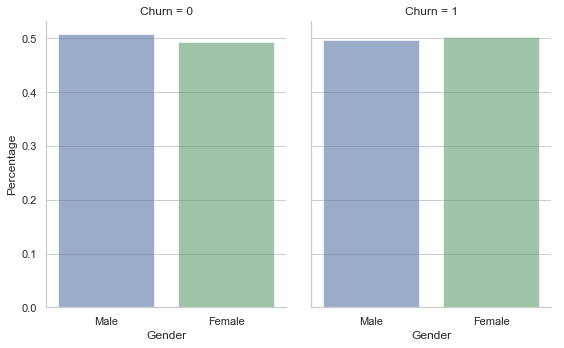

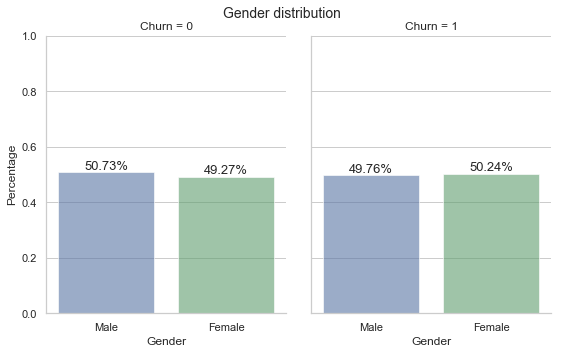

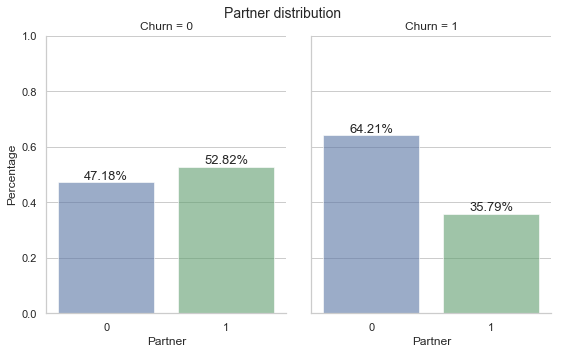

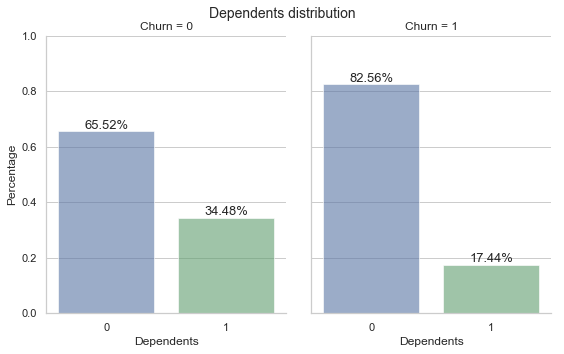

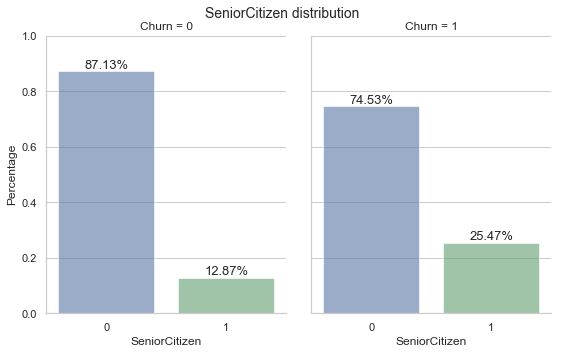

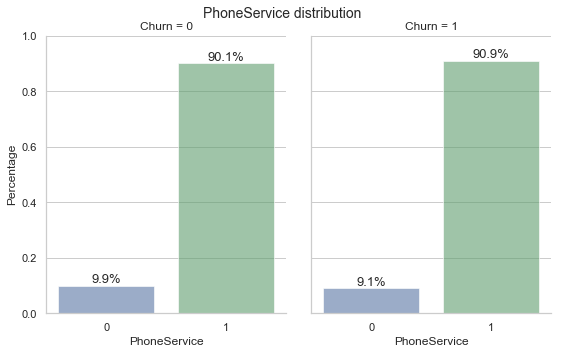

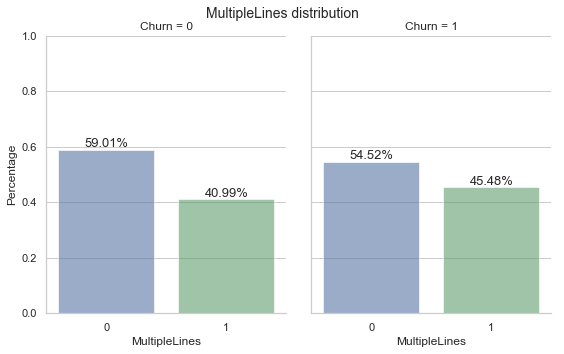

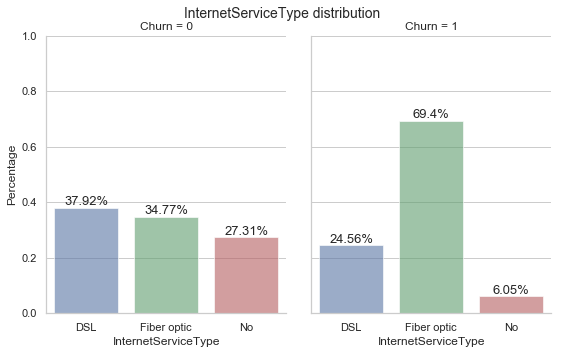

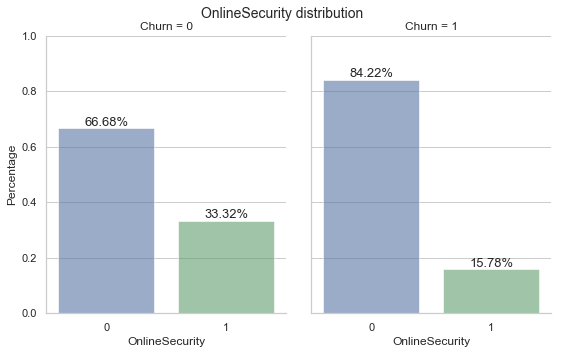

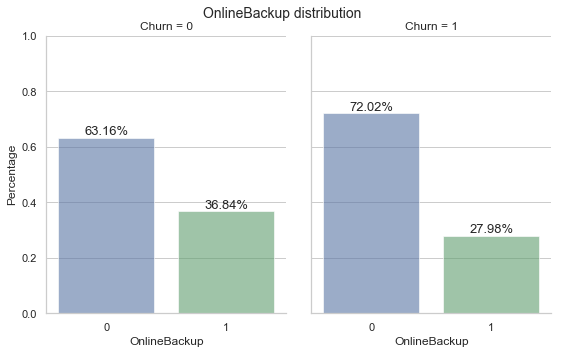

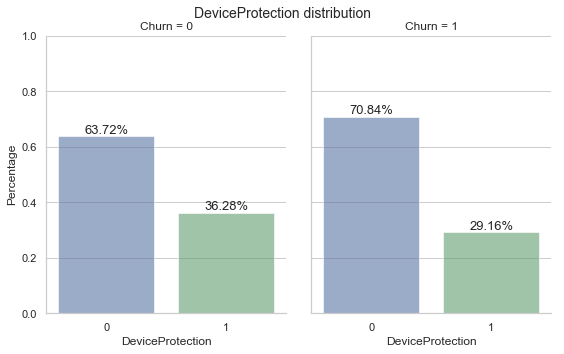

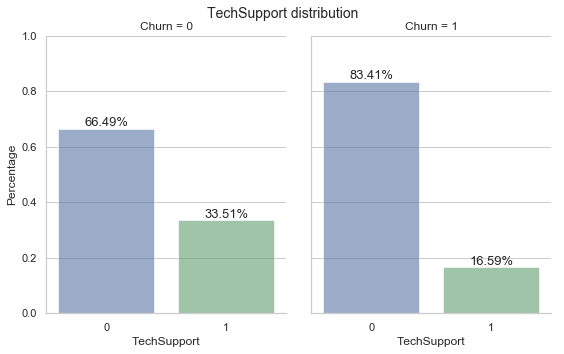

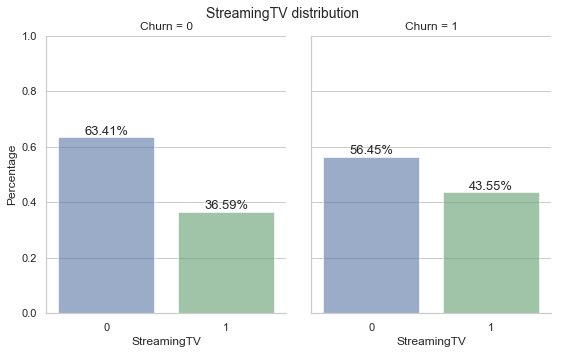

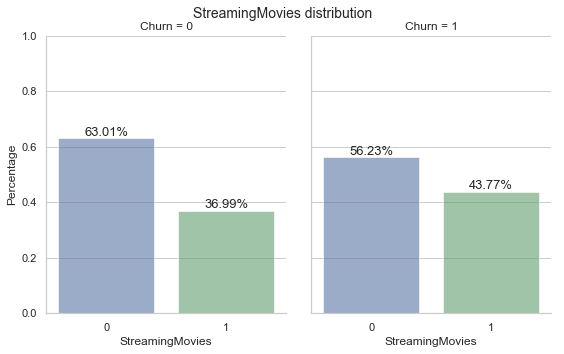

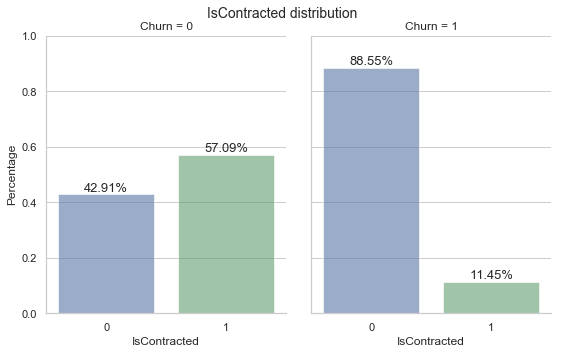

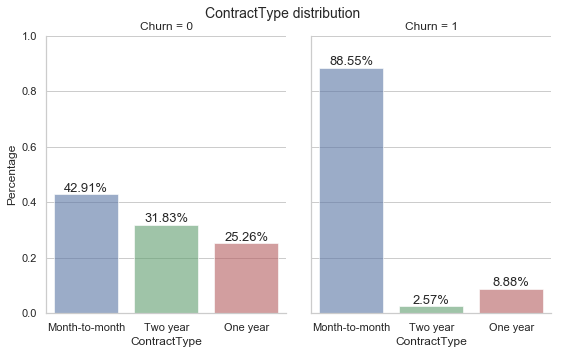

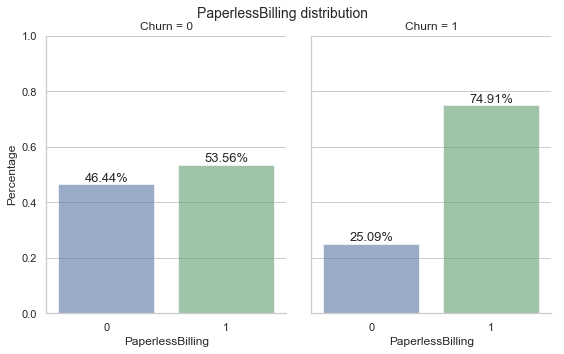

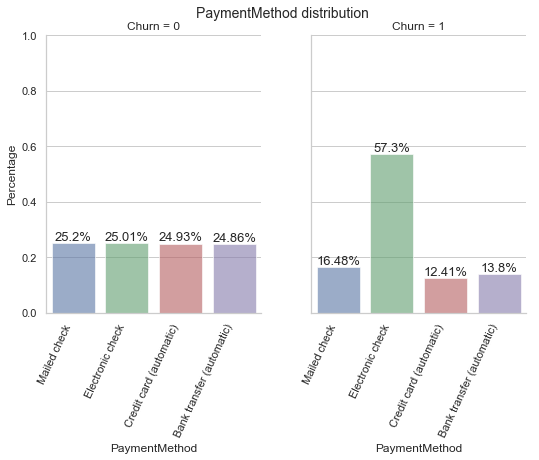

In [37]:
churn_summary = df_cal.groupby('Churn')
Categorical_var_churn_dist(churn_summary, cat_cols,'Churn')

From above analysis, churn customers are likely to 
<b>
- not have partners and Dependents; Means likely to be Single.
- have Internet service and specifically Fiber optics
- not have online security service, online backup service, device protection service, Tech support service
- have streaming TV and streaming Movies services
- be with monthly based contract
- have paperless billing service
- have electronic check payment method
</b>

#### Distribution of Tenure, Monthly Charges and Total Charges

In [38]:
# Mean summary of customers (Churn vs Non churn)
print(churn_summary['Tenure','MonthlyCharges','TotalCharges'].mean())

          Tenure  MonthlyCharges  TotalCharges
Churn                                         
0      37.569965       61.265124   2549.911442
1      17.979133       74.441332   1531.796094


Result shows that Churn customers have **more Monthly charges** compared to existing customers. <br>
Also, there is a drastic difference in **Tenure** and **Total Charges** for Churn vs existing customers. 

Let's check distribution of each features with target variable.

#### Tenure vs Churn Distribution

In [39]:
def Numerical_distribution(df_cal,feature):
    """ Distribution of numerical variable based on target variable"""
    fig = plt.figure(figsize=(15,10))
    
    plt.subplot(2,1,1)
    ax = sns.kdeplot(df_cal[feature]
                     , color = 'g'
                     , shade = True)
    
    title_str = "Original " +feature + " Distribution"
    plt.title(title_str)
    
    plt.subplot(2,1,2)
    ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==1),feature]
                     , color = 'g'
                     , shade = True
                     , label='Chrun')

    ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==0) ,feature]
                     , color = 'b'
                     , shade = True
                     , label='No chrun')
    
    title_str = feature + " Distribution: Churn vs No churn"
    plt.title(title_str)
    plt.show()

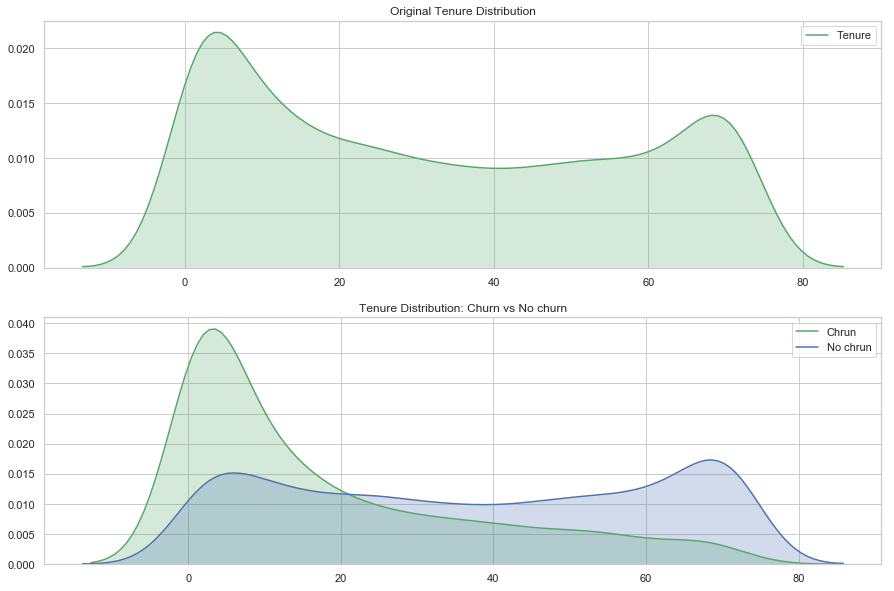

In [40]:
Numerical_distribution(df_cal,'Tenure')

#### MonthlyCharges vs Churn Distribution

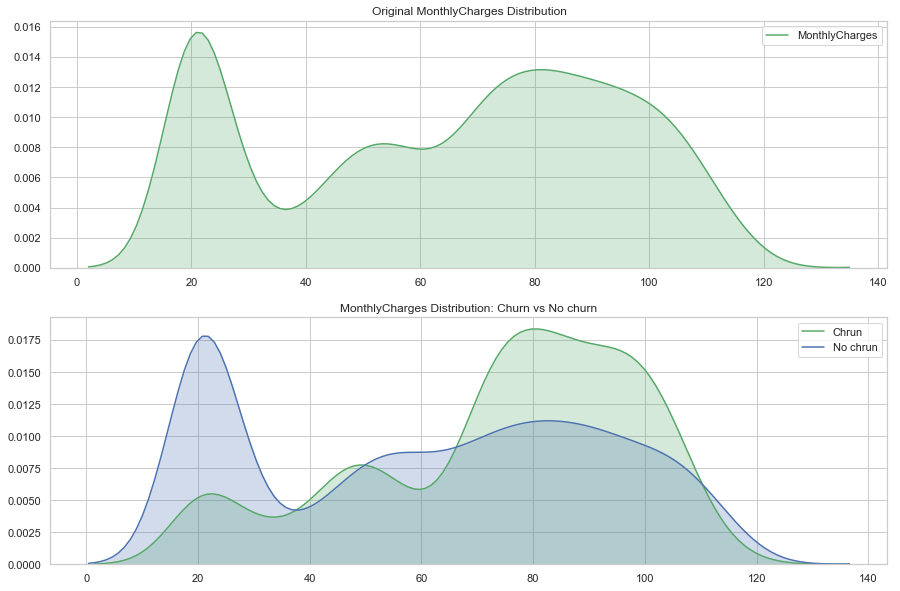

In [41]:
Numerical_distribution(df_cal,'MonthlyCharges')

#### TotalCharges vs Churn Distribution

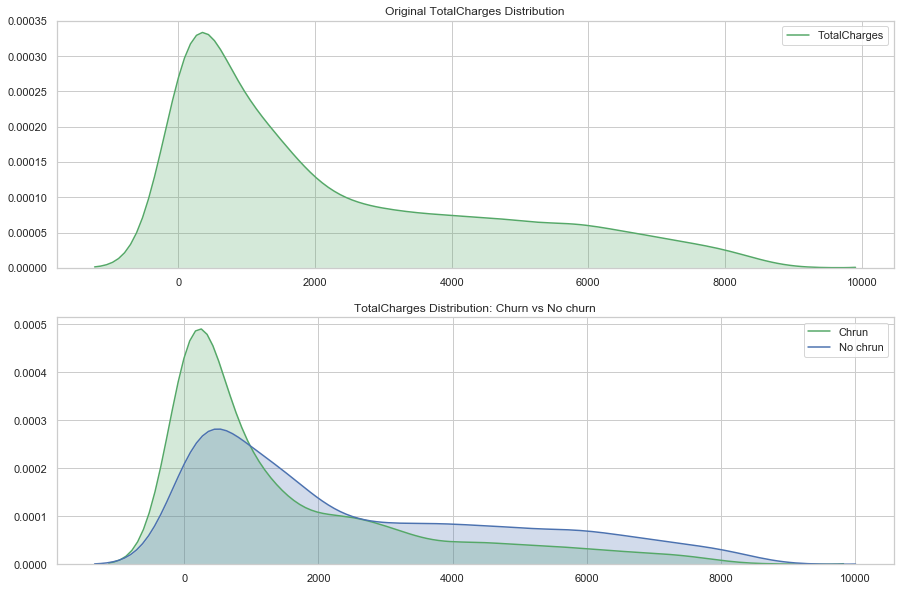

In [42]:
Numerical_distribution(df_cal, 'TotalCharges')

From above distribution, churn subscribers are
<b>
- more likely to leave company who's tenure is less than a year
- more likely to have more than $65 monthly charges
</b>

## 3. Cluster Analysis
<hr>

Let's check is there any relationship between Tenure and MonthlyCharges.

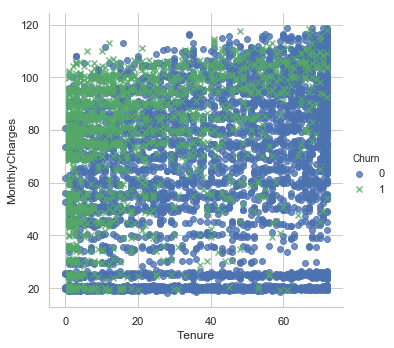

In [44]:
sns.lmplot(x='Tenure'
           ,y='MonthlyCharges'
           ,data=df_cal
           ,hue='Churn'
            ,fit_reg=False
            ,markers=["o", "x"]
            ,palette= plotColor)
plt.show()

**From the analysis, there are some clusters based on Tenure and Monthly Charges.**

Let's apply K-means cluster algorithm to see clusters. Before passing data to K-means algo, need to normalize Tenure and Monthly Charges.

In [45]:
def Normalize_feature(feature):
    """ Return normalized features """
    return prepro.StandardScaler().fit_transform(feature)

In [46]:
# normalized tenure and monthlycharges

df_cal['Tenure_norm'] = Normalize_feature(df_cal[['Tenure']])
df_cal['MonthlyCharges_norm'] = Normalize_feature(df_cal[['MonthlyCharges']])
df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted,Tenure_norm,MonthlyCharges_norm
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,-1.277445,-1.160323
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,One year,0,Mailed check,56.95,1889.50,0,1,1,0.066327,-0.259629
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,-1.236724,-0.362660
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1,0.514251,-0.746535
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,-1.236724,0.197365


In [49]:
def Create_elbow_curve(data):
    """ Display elbow curve for K-means algo for given data """
    df_kmeans_data = data

    k = range(1,10)
    kmeans = [KMeans(n_clusters=i) for i in k]

    score = [kmeans[i].fit(df_kmeans_data).score(df_kmeans_data)  for i in range(len(kmeans))]

    plt.figure(figsize=(10,6))
    plt.plot(k,score)
    plt.xlabel("Clusters")
    plt.ylabel("Score")
    plt.title("Elbow curve",fontsize=15)
    plt.show()

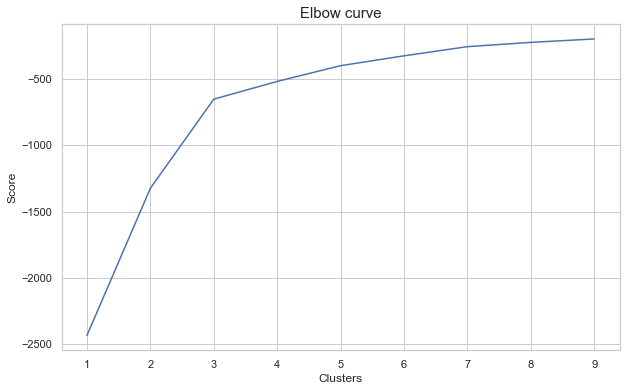

In [51]:
# checking number of clusters

Create_elbow_curve(df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']])

From Elbow curve, 3 seems most efficient.

In [57]:
def Create_kmeans_cluster_graph(df_cal, data, n_clusters, x_title, y_title, chart_title):
    """ Display K-means cluster based on data """
    
    kmeans = KMeans(n_clusters=n_clusters # No of cluster in data
                    , random_state = random_state # Selecting same training data
                   ) 

    kmeans.fit(data)
    kmean_colors = [plotColor[c] for c in kmeans.labels_]


    fig = plt.figure(figsize=(12,8))
    plt.scatter(x= x_title + '_norm'
                , y= y_title + '_norm'
                , data=data 
                , color=kmean_colors # color of data points
                , alpha=0.25 # transparancy of data points
               )

    plt.xlabel(x_title)
    plt.ylabel(y_title)

    plt.scatter(x=kmeans.cluster_centers_[:,0]
                , y=kmeans.cluster_centers_[:,1]
                , color='black'
                , marker='X' # Marker sign for data points
                , s=100 # marker size
               )
    
    plt.title(chart_title,fontsize=15)
    plt.show()
    
    return kmeans.fit_predict(df_cal[df_cal.Churn==1][[x_title+'_norm', y_title +'_norm']])

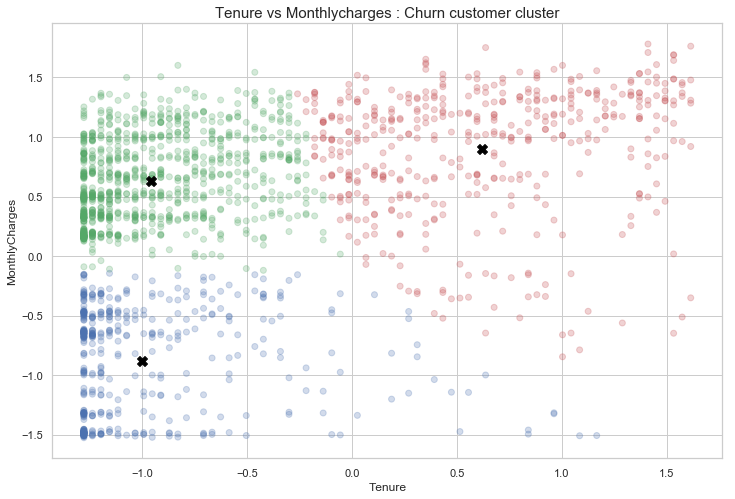

array([-1,  0,  1,  2], dtype=int64)

In [58]:
df_cal['Cluster'] = -1 # by default set Cluster to -1
df_cal.loc[(df_cal.Churn==1),'Cluster'] = Create_kmeans_cluster_graph(df_cal
                            ,df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']]
                            ,3
                           ,'Tenure'
                           ,'MonthlyCharges'
                           ,"Tenure vs Monthlycharges : Churn customer cluster")

df_cal['Cluster'].unique()

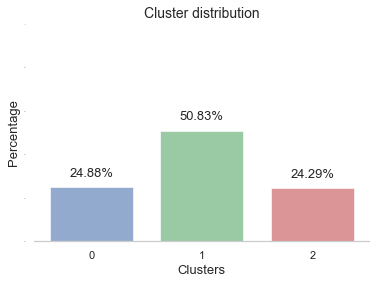

In [85]:
# Distribution of clusters
churn_distribution =  df_cal[df_cal['Churn']==1].Cluster.value_counts(normalize=True).sort_index()

Generate_bar_graph( x= churn_distribution.index
                   , y = churn_distribution.values
                   , x_title = 'Clusters'
                   , y_title = 'Percentage'
                   , chart_title = 'Cluster distribution'
                  , color = plotColor)

Based on K-means cluster graph, we can see that there are three groups.
1. Low Tenure and High Monthly Charges (Green cluster)
2. High Tenure and High Monthly Charges (Red cluster)
3. Low Tenure and Low Monthly Charges (Blue cluster)

And From distribution graph shows that around 50% of the customers belong to cluster Low Tenure and High Monthly Charges.

Let's check there average Tenure and Monthly Charges by cluster.

In [60]:
df_cluster_gp = df_cal[df_cal['Churn']==1].groupby('Cluster')
print(df_cluster_gp['Tenure','MonthlyCharges'].mean())

            Tenure  MonthlyCharges
Cluster                           
0         7.808602       38.329140
1         8.805263       83.795000
2        47.592511       91.855837


Based on demographic/usage/account related information, I have tried to explore characteristics of churn customer by each cluster. 

For example, in overall churn customer, percentage of female is 50.2%. And in cluster 2 ( Low tenure and high monthly charges), percentage of female is 53.15%. Meaning female are more likely to leave company due to high monthly charges and lower tenure.

Using this technique, I have explored other variables too.

In [61]:
def Extract_highest_in_cluster(df_cal, df_cluster, feature, tenure_charges_cluster_df ):
    """ For each features, compare cluster's value with overall value 
    and find out highest distributed features for that cluster  """
    
    df = df_cal.copy()
    feature_churn_dist = df[(df['Churn']==1)][feature].value_counts(normalize=True).reset_index()
    feature_churn_dist.columns = [feature,'Percentage']
    feature_cluster_dist = df_cluster[feature].value_counts(normalize=True).to_frame()
    feature_cluster_dist.columns = ['Percentage']
    feature_cluster_dist = feature_cluster_dist.reset_index()
    feature_cluster_dist_new = feature_cluster_dist.copy()
    
    tenure_MonthlyCharges_df = df_cal[df_cal['Churn']==1].groupby(['Cluster',feature],as_index=False)['Tenure','MonthlyCharges'].mean()
    for i,cluster in enumerate(feature_cluster_dist_new['Cluster'].unique()):
        for i, label in enumerate(feature_churn_dist[feature].unique()):
            cluster_val = feature_cluster_dist_new[(feature_cluster_dist_new['Cluster']==cluster) & (feature_cluster_dist_new[feature]==label)]['Percentage']
            feature_val = feature_churn_dist[feature_churn_dist[feature] == label]['Percentage']
            
            if((len(feature_val.values) > 0) & (len(cluster_val.values) > 0)) :
                if((feature_val.values[0] < cluster_val.values[0])):
                    
                    tenure_charges_cluster_df = tenure_charges_cluster_df.append(pd.DataFrame({'Category':feature
                            , 'Label': ("Not have a "+ feature) if (df_cal[feature].dtypes == 'int64') & (label == 0) else (("Have a "+feature) if (df_cal[feature].dtypes == 'int64') & (label == 1) else label)
                            , 'Percentage': cluster_val.values[0]
                            , 'Cluster' : cluster
                            , 'Avg_Tenure': round(tenure_MonthlyCharges_df[(tenure_MonthlyCharges_df['Cluster']==cluster) & (tenure_MonthlyCharges_df[feature]==label) ]['Tenure'].values[0],2)
                            , 'Avg_MonthlyCharges': round(tenure_MonthlyCharges_df[(tenure_MonthlyCharges_df['Cluster']==cluster) & (tenure_MonthlyCharges_df[feature]==label) ]['MonthlyCharges'].values[0],2)
                            , 'Represent_in_graph': 0 if (label == 0) | (label == 'No') else 1
                            , 'Label_in_graph' :  feature if (df_cal[feature].dtypes == 'int64') else label
                           }
                        , index = [len(tenure_charges_cluster_df)])
                        )
                    
                    
                    
    return tenure_charges_cluster_df


In [63]:
tenure_charges_cluster_df = pd.DataFrame()

for feature in ['Gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetServiceType'
       ,'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','ContractType'
       ,'PaperlessBilling','PaymentMethod','InternetService']:
        tenure_charges_cluster_df = Extract_highest_in_cluster(df_cal, df_cluster_gp, feature,tenure_charges_cluster_df)


### Cluster 1 - Low Tenure and Low Monthly Charges 

In [86]:
tenure_charges_cluster_df[tenure_charges_cluster_df['Cluster']==0]

,Category,Label,Percentage,Cluster,Avg_Tenure,Avg_MonthlyCharges,Represent_in_graph,Label_in_graph
0,Gender,Male,0.535484,0,7.73,38.82,1,Male
3,SeniorCitizen,Not have a SeniorCitizen,0.862366,0,7.72,38.33,0,SeniorCitizen
6,Partner,Not have a Partner,0.752688,0,6.31,38.52,0,Partner
9,Dependents,Have a Dependents,0.197849,0,9.61,38.21,1,Dependents
12,PhoneService,Not have a PhoneService,0.318280,0,10.19,35.52,0,PhoneService
15,MultipleLines,Not have a MultipleLines,0.909677,0,7.31,37.50,0,MultipleLines
18,InternetServiceType,DSL,0.756989,0,7.67,44.10,1,DSL
19,InternetServiceType,No,0.243011,0,8.24,20.37,0,No
22,OnlineSecurity,Not have a OnlineSecurity,0.864516,0,7.32,36.76,0,OnlineSecurity
25,OnlineBackup,Not have a OnlineBackup,0.858065,0,7.16,37.12,0,OnlineBackup


### Cluster 2 - Low Tenure and High Monthly Charges

In [87]:
tenure_charges_cluster_df[tenure_charges_cluster_df['Cluster']==1]

,Category,Label,Percentage,Cluster,Avg_Tenure,Avg_MonthlyCharges,Represent_in_graph,Label_in_graph
1,Gender,Female,0.531579,1,8.47,83.47,1,Female
4,SeniorCitizen,Have a SeniorCitizen,0.274737,1,9.67,84.56,1,SeniorCitizen
7,Partner,Not have a Partner,0.701053,1,7.94,83.28,0,Partner
10,Dependents,Not have a Dependents,0.860000,1,8.56,83.91,0,Dependents
13,PhoneService,Have a PhoneService,1.000000,1,8.81,83.80,1,PhoneService
16,MultipleLines,Have a MultipleLines,0.492632,1,10.57,87.30,1,MultipleLines
20,InternetServiceType,Fiber optic,0.956842,1,8.69,84.47,1,Fiber optic
23,OnlineSecurity,Not have a OnlineSecurity,0.892632,1,8.30,83.39,0,OnlineSecurity
26,OnlineBackup,Not have a OnlineBackup,0.776842,1,7.94,82.29,0,OnlineBackup
29,DeviceProtection,Not have a DeviceProtection,0.749474,1,8.07,81.48,0,DeviceProtection


### Cluster 2 - High Tenure and High Monthly Charges

In [88]:
tenure_charges_cluster_df[tenure_charges_cluster_df['Cluster']==2]

,Category,Label,Percentage,Cluster,Avg_Tenure,Avg_MonthlyCharges,Represent_in_graph,Label_in_graph
2,Gender,Male,0.519824,2,49.25,92.21,1,Male
5,SeniorCitizen,Have a SeniorCitizen,0.332599,2,46.03,92.03,1,SeniorCitizen
8,Partner,Have a Partner,0.594714,2,49.23,92.24,1,Partner
11,Dependents,Have a Dependents,0.222467,2,48.75,90.94,1,Dependents
14,PhoneService,Have a PhoneService,0.951542,2,47.28,93.93,1,PhoneService
17,MultipleLines,Have a MultipleLines,0.748899,2,48.33,96.74,1,MultipleLines
21,InternetServiceType,Fiber optic,0.854626,2,47.16,96.70,1,Fiber optic
24,OnlineSecurity,Have a OnlineSecurity,0.286344,2,50.43,93.32,1,OnlineSecurity
27,OnlineBackup,Have a OnlineBackup,0.539648,2,50.72,94.15,1,OnlineBackup
30,DeviceProtection,Have a DeviceProtection,0.537445,2,49.98,96.36,1,DeviceProtection


### Graphical representation of clusters

In [70]:
def Create_kmeans_cluster_with_label(data, cluster_visualize_gp, x_title, y_title, chart_title):
    """ Generate K-means cluster with labels """
    
    legend_list = []
    category_color = cluster_visualize_gp[['Category']].drop_duplicates().reset_index()
    annotations = []
    
    fig, ax = plt.subplots(figsize=(12,8))
    plt.scatter(x= x_title 
                , y= y_title
                , data=data 
                , color=[plotColor[c] for c in data.Cluster] # color of data points
                , alpha=0.25 # transparancy of data points
                , s = 15
               )

    for i,txt in enumerate(cluster_visualize_gp['Label_in_graph']):
        annotations.append(ax.text(cluster_visualize_gp['Avg_Tenure'][i]
                                , cluster_visualize_gp['Avg_MonthlyCharges'][i]
                                , txt
                                , fontsize = 13
                                , weight="bold"))
        ax.scatter(x=cluster_visualize_gp['Avg_Tenure'][i]
            , y=cluster_visualize_gp['Avg_MonthlyCharges'][i]
            , color = plotColor[category_color[category_color['Category'] == cluster_visualize_gp['Category'][i]].index[0]]
            , label = cluster_visualize_gp['Label_in_graph'][i]
            , marker = markers[category_color[category_color['Category'] == cluster_visualize_gp['Category'][i]].index[0]]
            , s=120 # marker size
           )
    
    for key,i in enumerate(category_color.Category.values):
        legend_list.append(mlines.Line2D([]
                            , []
                            , linestyle= 'None'
                            , color = plotColor[key]      
                            , markersize = 10
                            , marker = markers[key]
                            , label= i))
    
    adjust_text(annotations
                ,x=cluster_visualize_gp['Avg_Tenure']
                ,y=cluster_visualize_gp['Avg_MonthlyCharges'])
    
    plt.legend(handles=legend_list
              , loc = 'lower right')
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(chart_title,fontsize=15)
    plt.show()

D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


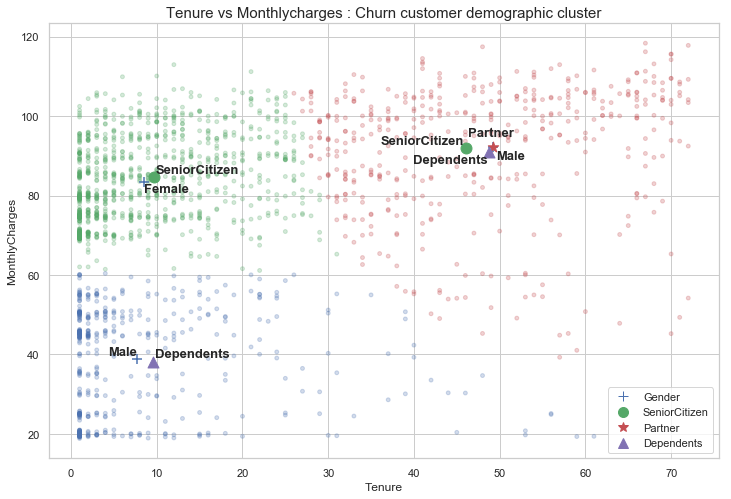

In [89]:
cluster_with_label_gp = tenure_charges_cluster_df[(tenure_charges_cluster_df['Represent_in_graph']==1) 
                          & ((tenure_charges_cluster_df['Category'] == 'Gender')
                            | (tenure_charges_cluster_df['Category'] == 'SeniorCitizen')
                            | (tenure_charges_cluster_df['Category'] == 'Partner')
                            | (tenure_charges_cluster_df['Category'] == 'Dependents'))]

Create_kmeans_cluster_with_label(df_cal[df_cal.Churn==1][['Tenure','MonthlyCharges','Cluster']]
                            ,cluster_with_label_gp.reset_index()
                           ,'Tenure'
                           ,'MonthlyCharges'
                           ,"Tenure vs Monthlycharges : Churn customer demographic cluster")


D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


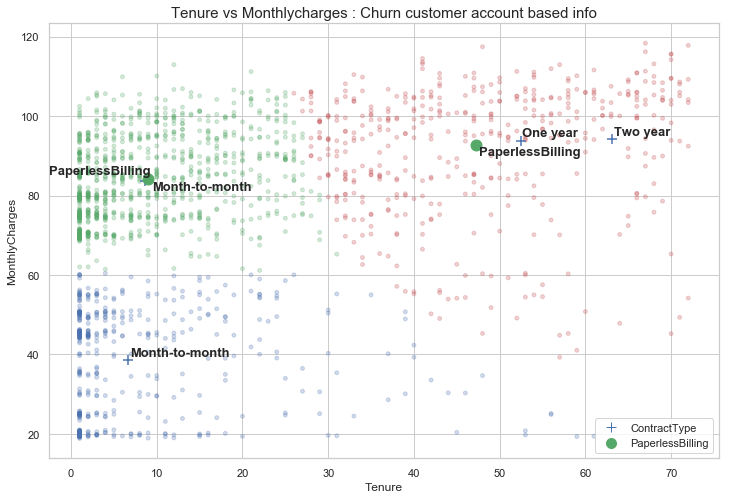

In [92]:
cluster_with_label_gp = tenure_charges_cluster_df[(tenure_charges_cluster_df['Represent_in_graph']==1) 
                          & ((tenure_charges_cluster_df['Category'] == 'ContractType')
                            | (tenure_charges_cluster_df['Category'] == 'PaperlessBilling')
                            | (tenure_charges_cluster_df['Category'] == 'PaymentMethods'))]

Create_kmeans_cluster_with_label(df_cal[df_cal.Churn==1][['Tenure','MonthlyCharges','Cluster']]
                            ,cluster_with_label_gp.reset_index()
                           ,'Tenure'
                           ,'MonthlyCharges'
                           ,"Tenure vs Monthlycharges : Churn customer account based info")

D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


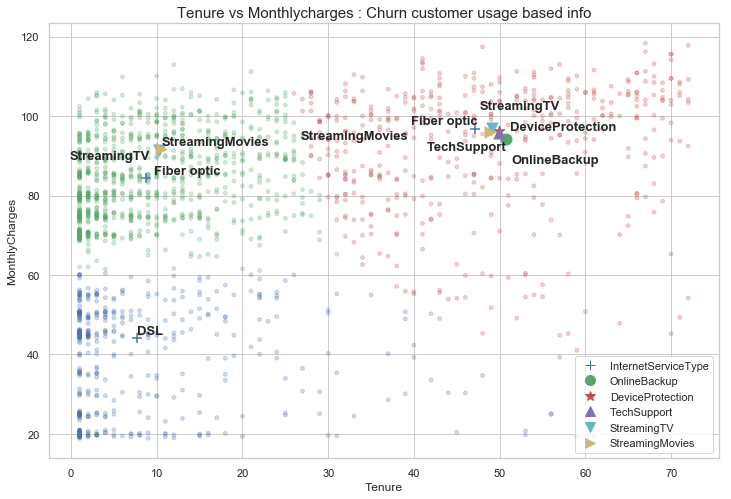

In [93]:
cluster_with_label_gp = tenure_charges_cluster_df[(tenure_charges_cluster_df['Represent_in_graph']==1) 
                          & ((tenure_charges_cluster_df['Category'] == 'StreamingTV')
                            | (tenure_charges_cluster_df['Category'] == 'StreamingMovies')
                            | (tenure_charges_cluster_df['Category'] == 'TechSupport')
                            | (tenure_charges_cluster_df['Category'] == 'DeviceProtection')
                            | (tenure_charges_cluster_df['Category'] == 'OnlineSupport')
                            | (tenure_charges_cluster_df['Category'] == 'OnlineBackup')
                            | (tenure_charges_cluster_df['Category'] == 'InternetServiceType'))]

Create_kmeans_cluster_with_label(df_cal[df_cal.Churn==1][['Tenure','MonthlyCharges','Cluster']]
                            ,cluster_with_label_gp.reset_index()
                           ,'Tenure'
                           ,'MonthlyCharges'
                           ,"Tenure vs Monthlycharges : Churn customer usage based info")

## 4. Churn customer prediction model
<hr>

### Data preprocessing

In [94]:
df_model = Data_transformation_renaming(df_raw)
df_model.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,One year,0,Mailed check,56.95,1889.50,0,1,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0


#### Train & Test data split

In [159]:
def Shuffle_data(df):
    """ Return shuffled data based on rows """
    return shuffle(df).reset_index().drop('index'
                                          , axis = 1)

def One_hot_encoding(df,feature):
    """ Apply one hot encoding to given features """
    return pd.concat([df
                      , pd.get_dummies(df[feature])]
                     , axis = 1)

def Merge_df(data, features):
    """ Return merge dataframe with given features"""
    merged_df = pd.DataFrame()
    for feature in features:
        merged_df = pd.concat([merged_df, data[feature]]
                              , axis = 1)
    return merged_df


def Normalize_df(data, cols):
    """ Normalize features """
    for col in cols:
        data[col] = Normalize_feature(data[[col]])
        
    return data    

def Create_model_df(df, col_cols, nom_cols, binary_cols, num_cols, target_col):
    """ Preparing data for modelling """
    
    df_model = Merge_df(df , [col_cols, num_cols, target_col])
    df_model = Shuffle_data(df_model)
    df_model = One_hot_encoding(df_model, nom_cols)
    
    df_model.drop(nom_cols, axis = 1, inplace = True)
    
    df_model = Normalize_df(df_model, num_cols)
    
    return (df_model.loc[:, ~df_model.columns.isin(target_col)]
            , df_model[target_col].values.flatten())


def Train_test_df(feature, target, test_size):
    """ Spliting data to train and test"""
    return train_test_split(feature
                     ,target
                     ,test_size= test_size
                     ,random_state= random_state)

In [102]:
df_model_feature ,df_model_target = Create_model_df(df_model
                                                    , cat_cols
                                                    , nominal_cols
                                                    , binary_cols
                                                    , num_cols
                                                    , [target_col])

x_train, x_test, y_train, y_test = Train_test_df(df_model_feature
                                                 , df_model_target
                                                 , test_size = 0.2)


print("----------------------------")
print("Original features shape, ", df_model_feature.shape)
print("Original target shape, ", df_model_target.shape)
print("x train shape, ", x_train.shape)
print("y train shape, ", y_train.shape)
print("x test shape, ", x_test.shape)
print("y test shape, ", y_test.shape)
print("----------------------------")


----------------------------
Original features shape,  (7043, 28)
Original target shape,  (7043,)
x train shape,  (5634, 28)
y train shape,  (5634,)
x test shape,  (1409, 28)
y test shape,  (1409,)
----------------------------


#### Class imbalance

In [2]:
# Distribution in train dataset

Churn_rate = pd.value_counts(y_train) / len(y_train)
Generate_bar_graph(Churn_rate.index.map({0:'Existing',1:"Churn"})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')

NameError: name 'pd' is not defined

Here, our training model has class imbalance issue due to inequality in data distribution. 

#### Upsampling the train data

In [161]:
# Upsampling using SMOTE
sm = SMOTE(random_state = random_state
           , ratio = 1.0)
x_train_sm , y_train_sm = sm.fit_sample(x_train,y_train)

print("----------------------------")
print("Original x train shape, ", x_train.shape)
print("Resample x train shape, ", x_train_sm.shape)
print("----------------------------")


----------------------------
Original x train shape,  (5634, 28)
Resample x train shape,  (8248, 28)
----------------------------


D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# After upsampling distribution in train dataset

Churn_rate = pd.value_counts(y_train_sm) / len(y_train_sm)
Generate_bar_graph(Churn_rate.index.map({0:'Existing',1:"Churn"})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')

NameError: name 'pd' is not defined

###  Model Development
<hr>

### Model Selection


Here, I have used Logistic regression, Random forest and Gradient boosting models to predict churn customers and compared which model works better for our dataset. Also, analyzed original dataset and upsampling data for all these models.

### Hypterparameter Tunning

Based on original and Upsampling data, tunned hyperparameter for our traing data for all three models.

In [110]:
def Parameter_tunning(x, y, models, clsModelsNm, parameters, score):
    
    tuned_params = {}
    for i,model in enumerate(models):
        print(clsModelsNm[i])
        grid = GridSearchCV(estimator = model 
                            , cv = 5
                            , param_grid = parameters[clsModelsNm[i]]
                            , scoring = score
                            , n_jobs = 3)
        grid.fit(x,y)
        print(grid.best_score_)
        print(grid.best_params_)
        tuned_params[clsModelsNm[i]] = {'params':grid.best_params_}
    
    return tuned_params

#### Original data

In [ ]:
clsParams = {'Logistic Regression':{'C':[0.1, 0.5, 1, 5, 10, 15, 20, 100]
                                   ,'penalty':['l1','l2']
                                    }
             , 'Random Forest': {'max_depth':[3,5,7,10,15,20]
                                ,'n_estimators':[100,150,200]
                                ,'max_features':['auto',0.7,0.2]
                                ,'min_samples_leaf':[1,5,10,15,20]
                                 }
             , 'Gradient boosting': {'learning_rate': [0.05, 0.1, 0.2]
                                    ,'n_estimators':[10,50,100,150,200]
                                    ,'max_depth':[3,5,7]
                                    ,'min_samples_split':[0.1, 0.5, 1.0]
                                    ,'min_samples_leaf':[1, 5, 10, 15, 20]
                                    ,'subsample': [0.1, 0.5, 0.7 , 1]
                                    }
            }

tuned_params = Parameter_tunning(x_train, y_train, clsModels, clsModelsNm, clsParams, 'neg_log_loss')

#### Upsampling data

In [167]:
clsParams = {'Logistic Regression':{'C':[0.1, 0.5, 1, 5, 10, 15, 20, 100]
                                   ,'penalty':['l1','l2']
                                    }
             , 'Random Forest': {'max_depth':[3,5,7,10,15,20]
                                ,'n_estimators':[100,150,200]
                                ,'max_features':['auto',0.7,0.2]
                                ,'min_samples_leaf':[1,5,10,15,20]
                                 }
             , 'Gradient boosting': {'learning_rate': [0.05, 0.1, 0.2]
                                    ,'n_estimators':[10,50,100,150,200]
                                    ,'max_depth':[3,5,7]
                                    ,'min_samples_split':[0.1, 0.5, 1.0]
                                    ,'min_samples_leaf':[1, 5, 10, 15, 20]
                                    ,'subsample': [0.1, 0.5, 0.7 , 1]
                                    }
            }

tuned_params = Parameter_tunning(x_train_sm, y_train_sm, clsModels, clsModelsNm, clsParams, 'neg_log_loss')

Logistic Regression
-0.473604542462673
{'C': 0.5, 'penalty': 'l1'}
Random Forest
-0.35229243627199164
{'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 200}
Gradient boosting
-0.34636274893274316
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 0.1, 'n_estimators': 200, 'subsample': 0.7}


### Model comparision

During hyperparameter tunning process, I got best parameters for each models. using these parameter and corss_val_score method, I have compared different metrics and try to find best threshold value with lower log loss score.


Intuition process - 

Because target variable is binary value, log loss would be better metrics to find uncertainity of the model. Once I'll explore a better model wih lower log loss score, then I'll tune threshold to improve F1/Recall/Precision score.

In [8]:
# Graph of precision & recall against threshold
def plot_precision_recall_vs_thresold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1],label="Precision")
    plt.plot(thresholds,recalls[:-1],label="Recall")
    plt.plot(thresholds,2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1]) ,label="F1")
    plt.title("Precision, recall & F1 vs thresold")
    plt.xlabel("Thresold")
    plt.legend(loc='lower right')
    plt.show()

In [4]:
def Cross_validation_score(clsModels, clsModelsNm, clsSample, scoreMatrix):
    """ Cross validation using cross_val_score method """
    for i,model in enumerate(clsModels):
        print("===============================================")
        print(clsModelsNm[i])

        for j, sample in enumerate(clsSample):
            print("************************************************")
            print(sample[2])
            
            for score in scoreMatrix:
                scores = cross_val_score(model, sample[0], sample[1], cv=5 , scoring = score)
                print(score, " score:", scores.mean())
                
            y_scores = cross_val_predict(model, sample[0], sample[1], cv=5, method="predict_proba") 
            
            
            precisions, recalls, thresholds = metrics.precision_recall_curve(sample[1], y_scores[:][:,1]) 
            plot_precision_recall_vs_thresold(precisions, recalls, thresholds)
            score_matrix = pd.DataFrame({'Precisions': precisions[:-1]
                                ,'Recalls': recalls[:-1]
                                ,'F1': 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1])
                                ,'Threshold': thresholds
                               })
            #print("When percision and recall are same \n" , score_matrix[ score_matrix['Precisions'] == score_matrix['Recalls']] )
            print("When F1 score is max \n" , score_matrix[ score_matrix['F1'] == max(score_matrix['F1'])] )


#### Original data

Logistic Regression
************************************************
Original data
accuracy  score: 0.804225682859444
precision  score: 0.6646242247180709
recall  score: 0.5509933774834437
f1  score: 0.6018552558429249
neg_log_loss  score: -0.4184781299871717


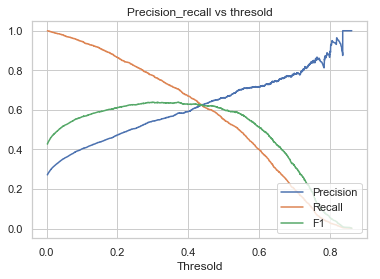

When percision and recall are same 
       Precisions   Recalls        F1  Thresold
4045    0.624503  0.624503  0.624503  0.436507
When F1 score is max 
       Precisions  Recalls        F1  Thresold
3728     0.58347  0.70596  0.638897  0.370528
Random Forest
************************************************
Original data
accuracy  score: 0.8058253651294482
precision  score: 0.6806579439302449
recall  score: 0.5245033112582782
f1  score: 0.5918521127690434
neg_log_loss  score: -0.4162767067271872


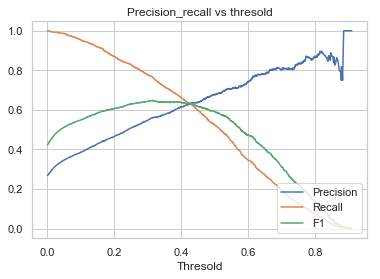

When percision and recall are same 
       Precisions   Recalls        F1  Thresold
4103    0.631126  0.631126  0.631126  0.426362
When F1 score is max 
       Precisions   Recalls        F1  Thresold
3563    0.561557  0.764238  0.647405  0.315244
Gradient boosting
************************************************
Original data
accuracy  score: 0.8072445906310628
precision  score: 0.6747455867862688
recall  score: 0.5470198675496689
f1  score: 0.6037060507019332
neg_log_loss  score: -0.4135114853614573


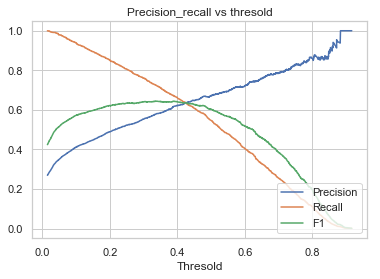

When percision and recall are same 
       Precisions   Recalls        F1  Thresold
3995    0.636424  0.636424  0.636424  0.424352
When F1 score is max 
       Precisions   Recalls        F1  Thresold
3638    0.581333  0.721854  0.644018  0.339275


In [328]:
# Original data

clsLR = LogisticRegression(random_state = random_state
                           , C = 0.5
                           , penalty = 'l2')

clsRF = RandomForestClassifier(random_state = random_state
                              ,max_depth = 10
                              ,max_features = 'auto'
                              ,min_samples_leaf = 10
                              ,n_estimators = 200 )

clsGB = GradientBoostingClassifier(random_state = random_state
                              , max_depth = 3
                              , n_estimators = 150
                              , learning_rate = 0.05
                              , min_samples_leaf = 15 
                              , min_samples_split = 0.1
                              , subsample = 0.7)


clsModels = [clsLR, clsRF, clsGB]

Cross_validation_score(clsModels, clsModelsNm, [(x_train, y_train,'Original data')], scoreMatrix)



#### Upsampling data

Logistic Regression
************************************************
Upsampled data
accuracy  score: 0.7720698734922037
precision  score: 0.7510364299875133
recall  score: 0.8145004413062665
f1  score: 0.7813948161744697
neg_log_loss  score: -0.47377382693727776


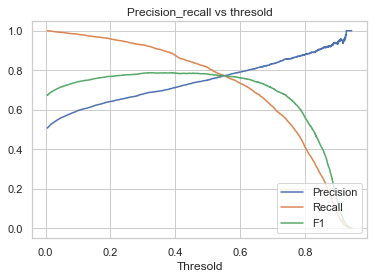

When percision and recall are same 
       Precisions   Recalls        F1  Thresold
3995    0.772551  0.772551  0.772551  0.550601
When F1 score is max 
       Precisions   Recalls        F1  Thresold
2954    0.708043  0.887973  0.787866  0.386736
Random Forest
************************************************
Upsampled data
accuracy  score: 0.8582824360105914
precision  score: 0.8459768962743942
recall  score: 0.8734489555751692
f1  score: 0.8558304237884435
neg_log_loss  score: -0.352270043932639


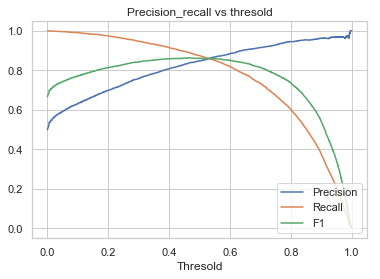

When percision and recall are same 
       Precisions  Recalls       F1  Thresold
1093     0.85936  0.85936  0.85936   0.52876
When F1 score is max 
      Precisions   Recalls        F1  Thresold
906    0.837241  0.891853  0.863684     0.465
Gradient boosting
************************************************
Upsampled data
accuracy  score: 0.8425239776404825
precision  score: 0.852573092669178
recall  score: 0.823026478375993
f1  score: 0.8266721270731485
neg_log_loss  score: -0.3463290984740802


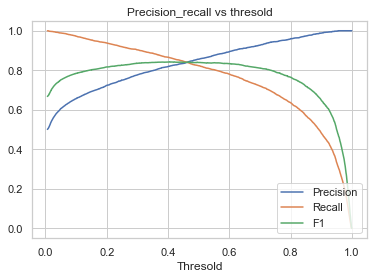

When percision and recall are same 
       Precisions   Recalls        F1  Thresold
4095    0.840689  0.840689  0.840689  0.462378
When F1 score is max 
       Precisions   Recalls        F1  Thresold
3867    0.820124  0.865664  0.842279  0.401851


In [329]:
# resample data

clsLR_sm = LogisticRegression(random_state = random_state
                           , C = 15
                           , penalty = 'l1')

clsRF_sm = RandomForestClassifier(random_state = random_state
                               , max_depth = 20
                              , n_estimators = 200
                              , max_features = 'auto'
                              , min_samples_leaf = 1 )

clsGB_sm = GradientBoostingClassifier(random_state = random_state
                              , max_depth = 5
                              , n_estimators = 200
                              , learning_rate = 0.1
                              , min_samples_leaf = 20 
                              , min_samples_split = 0.1
                              , subsample = 0.7)

                        
clsModels_sm = [clsLR_sm, clsRF_sm, clsGB_sm]

Cross_validation_score(clsModels_sm, clsModelsNm, [(x_train_sm, y_train_sm,'Upsampled data')], scoreMatrix)

Using these threshold values, now we will tune our model and evaluate it on testing dataset.

### Model Evaluation


Up till now, I was working on training dataset to train model. Let's checked how models are performing on unseen dataset (testing).

In [142]:
def Cus_log_loss(target, predicted):
    if len(predicted) != len(target):
        print("Data object initiated")
        return
    
    target = [float(x) for x in target] # converting target into float
    predicted = [min([max([x,1e-15]), 1-1e-15]) for x in predicted]
        
    return -1.0 / len(target) *  sum([ target[i] * math.log(predicted[i]) + (1.0 - target[i]) * math.log(1.0 - predicted[i]) 
                                      for i in range(len(predicted))])

In [340]:
def Model_evaluation(models, clsModelsNm, x_train, y_train, x_test, y_test,  threshold ):
    
    predicted_val = {}
    for i, model in enumerate(clsModelsNm):
        models[i].fit(x_train,y_train)
        predicted_proba = models[i].predict_proba(x_test)
        
        predicted = predicted_proba[:,1].copy()
        predicted[predicted >=threshold[i]] = 1
        predicted[predicted < threshold[i]] = 0
        
        confusion_matrix_matrix = metrics.confusion_matrix(y_true = y_test
                                                   ,y_pred = predicted
                                                   #,normalize = 'true' 
                                                   )
        #confusion_matrix_matrix = confusion_matrix_matrix / confusion_matrix_matrix.astype(np.float).sum(axis=1)
        
        print("***********",clsModelsNm[i], "*************")
        print(metrics.classification_report(y_test, predicted))
        print("*******************************************")
        #print("Log loss score", round(metrics.log_loss(y_test,models[i].predict_proba(x_test)[:,1]),2))
        print("Log loss score", round(Cus_log_loss(y_test,predicted_proba[:,1]),2))
        print("*******************************************")
        #print("Confusion matrix")
        #sns.heatmap(confusion_matrix_matrix
        #            , annot=True
        #            , fmt="d"
        #           )
        #plt.xlabel("Predicted label")
        #plt.ylabel("Actual label")
        #plt.show()
        print("*******************************************")
        
        predicted_val[model] = predicted

#### Original data

In [349]:
Logistic_threshold = 0.37
Random_forest_threshold = 0.31
Gradient_boosting_threshold = 0.33

Model_evaluation(clsModels
                 , clsModelsNm
                 , x_train
                 , y_train
                 , x_test
                 , y_test
                 , [Logistic_threshold
                    ,Random_forest_threshold
                    , Gradient_boosting_threshold  ] )

*********** Logistic Regression *************
             precision    recall  f1-score   support

          0       0.87      0.81      0.84      1050
          1       0.55      0.66      0.60       359

avg / total       0.79      0.77      0.78      1409

*******************************************
Log loss score 0.41
*******************************************
*******************************************
*********** Random Forest *************
             precision    recall  f1-score   support

          0       0.90      0.77      0.83      1050
          1       0.52      0.74      0.61       359

avg / total       0.80      0.76      0.77      1409

*******************************************
Log loss score 0.41
*******************************************
*******************************************
*********** Gradient boosting *************
             precision    recall  f1-score   support

          0       0.89      0.80      0.84      1050
          1       0.55      0

#### Upsampling data

In [350]:
Logistic_threshold_sm = 0.38
Random_forest_threshold_sm = 0.46
Gradient_boosting_threshold_sm = 0.40

Model_evaluation(clsModels_sm
                 , clsModelsNm
                 , x_train_sm
                 , y_train_sm
                 , x_test
                 , y_test
                 , [Logistic_threshold_sm
                    ,Random_forest_threshold_sm
                    , Gradient_boosting_threshold_sm  ] )

*********** Logistic Regression *************
             precision    recall  f1-score   support

          0       0.94      0.63      0.75      1050
          1       0.45      0.88      0.59       359

avg / total       0.81      0.69      0.71      1409

*******************************************
Log loss score 0.49
*******************************************
*******************************************
*********** Random Forest *************
             precision    recall  f1-score   support

          0       0.86      0.83      0.84      1050
          1       0.55      0.62      0.58       359

avg / total       0.78      0.77      0.78      1409

*******************************************
Log loss score 0.48
*******************************************
*******************************************
*********** Gradient boosting *************
             precision    recall  f1-score   support

          0       0.88      0.79      0.83      1050
          1       0.53      0

### Model conclusion

Based on model comparision and evaluation process, upsampling data works better during training process, however not with unseen data (based on log loss score). One of the reason could be data leakage in corss_val_score step.

However, log loss score for original dataset remains same with training dataset as well as testing dataset.

From above analysis, gradient boosting with original dataset has stable and best score. So, for prediction process I have used it.

### Feature importance

Text(0.5,1,'Feature importance')

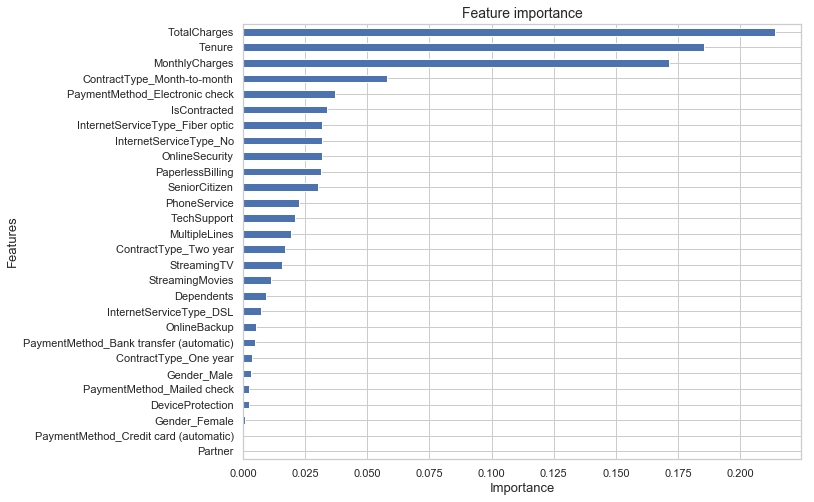

In [348]:
feature_importance = pd.Series(clsGB.feature_importances_, x_train.columns)
plt.figure(figsize = (10,8))
feature_importance.sort_values().plot(kind = 'barh')
plt.xlabel("Importance", fontsize = 13)
plt.ylabel("Features", fontsize = 13)
plt.title("Feature importance", fontsize = 14)

Based on feature importance graph, it tells that Totalcharges, Tenure, Monthly charges , Contract type, Payment method,  Internet sevice type, PaperlessBilling are some important features to predict churn customers.

In [352]:
churn_customer_prob = pd.DataFrame({'Predicted_proba': clsGB.predict_proba(x_test)[:][:,1]
                                   , 'predicted': clsGB.predict(x_test)})
churn_customer_prob

,Predicted_proba,predicted
0,0.020595,0
1,0.034926,0
2,0.445076,0
3,0.794266,1
4,0.149975,0
...,...,...
1404,0.029278,0
1405,0.310415,0
1406,0.190929,0
1407,0.027218,0


## 5. Retention plan

### Prediction on Existing Customer

Since we generated a model based on Churn and Existing customers, which help to classify both of them. Now we can use same model on existing customers to find the probability of churn.

In [353]:
existing_cust = df_model[df_model['Churn']==0]
existing_cust_feature ,existing_cust_target = Create_model_df(df_model[df_model['Churn']==0]
                                                    , cat_cols
                                                    , nominal_cols
                                                    , binary_cols
                                                    , num_cols
                                                    , [target_col])

In [354]:
existing_customer_churn_prob = clsGB.predict_proba(existing_cust_feature)

In [355]:
existing_cust['Churn_proba'] = existing_customer_churn_prob[:][:,1]

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5,1,"Existing customers' Churn probability distribution")

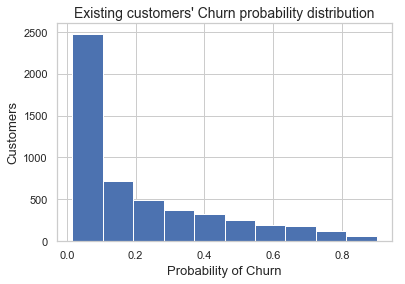

In [356]:
plt.hist(existing_cust['Churn_proba']
         , bins = 10)

plt.xlabel("Probability of Churn", fontsize=13)
plt.ylabel("Customers", fontsize=13)
plt.title("Existing customers' Churn probability distribution", fontsize=14)

Define existing customers based on probability of churn; <br>

<img src='../images/Churn_probability_distribution.png' width=500 height=500></img>

In [5]:
existing_cust.loc[existing_cust['Churn_proba'] >= 0.8 , 'Risk_type'] = 'Very high'
existing_cust.loc[(existing_cust['Churn_proba'] >= 0.6) & (existing_cust['Churn_proba'] < 0.8)  , 'Risk_type'] = 'High'
existing_cust.loc[(existing_cust['Churn_proba'] >= 0.4) & (existing_cust['Churn_proba'] < 0.6) , 'Risk_type'] = 'Medium'
existing_cust.loc[(existing_cust['Churn_proba'] >= 0.2) & (existing_cust['Churn_proba'] < 0.4) , 'Risk_type'] = 'Low'
existing_cust.loc[(existing_cust['Churn_proba'] > 0.0) & (existing_cust['Churn_proba'] < 0.2) , 'Risk_type'] = 'Very low'

NameError: name 'existing_cust' is not defined

In [6]:
existing_cust['Risk_type'].value_counts()

NameError: name 'existing_cust' is not defined

In [7]:
existing_cust['Risk_type'].value_counts().plot(kind = 'barh')
plt.title("Existing customer risk type distribution", fontsize=14)
plt.ylabel("Risk type", fontsize = 13)
plt.xlabel("Customers", fontsize = 13)

NameError: name 'existing_cust' is not defined

We can provide retension plans to high risk and very high risk type customers.

# Conclusion



In this notebook, I have tried to divide customer churn prediction problem into steps like exploration, profiling, clustering, model selection & evaluation and retention plans. Based on this analysis, we can help retention team to analyze high risk churn customers before they leave the company.